In [111]:
from google.colab.patches import cv2_imshow

In [1]:
# Import all nessessary modules
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from timeit import timeit
from random import sample
from copy import deepcopy as dp

# setup the plotting parameters
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams["figure.dpi"] = 100
img_dir = "/content/gdrive/My Drive/Colab Notebooks/Algos_lab6/images"

In [2]:
def generate_graph(vertexes=100, edges=500):
    G = nx.dense_gnm_random_graph(vertexes, edges)
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = np.random.randint(0,10)
        
    return G

def draw_graph(G):
    plt.subplot(111)
    # nx.draw(G, with_labels=True, font_weight='bold')
    #plt.subplot(122)

    nx.draw_shell(G, with_labels=True, font_weight='bold')

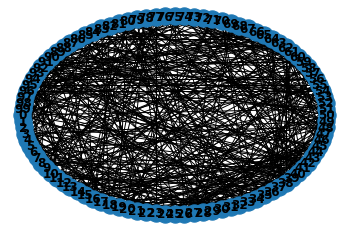

In [3]:
G = generate_graph()
draw_graph(G)

In [4]:
v_start = np.random.randint(0, 100)

In [5]:
%timeit -n10 _ = nx.single_source_dijkstra_path(G, v_start)
%timeit -n10 _ = nx.single_source_bellman_ford_path(G, v_start)

10 loops, best of 3: 1.06 ms per loop
10 loops, best of 3: 2.73 ms per loop


In [6]:
class Grid:
  def __init__(self, n=10, obst_n=30):
    self.n = n
    self.obst_n = obst_n
    self.adj_matrix = np.zeros(shape=(self.n**2, self.n**2))
    self.blocked_sells = sample(range(0, self.n**2), self.obst_n)
    self.generate_grid(self.n, self.obst_n)
    self.grid_array = self.get_grid()
  def generate_grid(self, n=10, obst_n=30):
    self.blocked_sells = sample(range(0, self.n**2), self.obst_n)
    self.adj_matrix = np.zeros(shape=(n**2, n**2))

    for i in range(n**2):
      if i in self.blocked_sells:
        continue
      if i//n !=0 and i-n not in self.blocked_sells:
        self.adj_matrix[i, i-n] = 1
        self.adj_matrix[i-n, i] = 1
      if i//n != (n - 1) and i+n not in self.blocked_sells:
        self.adj_matrix[i, i+n] = 1
        self.adj_matrix[i+n, i] = 1
      if i%n != 0 and i-1 not in self.blocked_sells:
        self.adj_matrix[i, i-1] = 1
        self.adj_matrix[i-1, i] = 1
      if i%n != (n-1) and i+1 not in self.blocked_sells:
        self.adj_matrix[i, i+1] = 1
        self.adj_matrix[i+1, i] = 1

    self.graph = nx.Graph(self.adj_matrix)
    for i in range(self.n**2):
      self.graph.nodes[i]["coord"] = (i//self.n, i%self.n)


  def return_graph(self):
    return self.graph

  def get_grid(self):
    grid = np.zeros(shape=(self.n, self.n,))
    for i in range(self.n**2):
      if i not in self.blocked_sells:
        grid[i//self.n, i%self.n] = 1

    return grid

  def astar(self, start, end, use_equclidian = False):
    def h(v, u):
      if not use_equclidian:
        dx = abs(self.graph.nodes[u]["coord"][0] - self.graph.nodes[v]["coord"][0])
        dy = abs(self.graph.nodes[u]["coord"][1] - self.graph.nodes[v]["coord"][1])
        dist = dx+dy
      elif use_equclidian:
        dx = abs(self.graph.nodes[u]["coord"][0] - self.graph.nodes[v]["coord"][0])
        dy = abs(self.graph.nodes[u]["coord"][1] - self.graph.nodes[v]["coord"][1])
        dist = (dx**2 + dy**2)**0.5

      return dist

    print(f"Searching for a path between {start//self.n, start%self.n} and {end//self.n, end%self.n}")
    path = []
    try:
      path = nx.astar_path(self.graph, start, end, h)
    except nx.exception.NetworkXNoPath as e:
      print("No path found between two nodes")

    return path

  def draw_grid(self):
    fig, ax = plt.subplots()
    im = ax.imshow(grid_array, cmap="gray")

    ax.set_xticks(np.arange(self.n))
    ax.set_yticks(np.arange(self.n))

    fig.tight_layout()
    plt.show()
  
  def draw_path(self, path):
    start = path[0]
    end = path[-1]

    g = dp(self.grid_array)

    for step in path:
      g[step//self.n, step%self.n] = 0.5

    g[start//self.n, start%self.n] = 0.75
    # g[end//self.n, start%self.n] = 2

    fig, ax = plt.subplots()
    im = ax.imshow(g, cmap='gray')

    ax.set_xticks(np.arange(self.n))
    ax.set_yticks(np.arange(self.n))

    fig.tight_layout()
    plt.show()

In [124]:
class Grid:
  def __init__(self, n=10, obst_n=30):
    self.n = n
    self.obst_n = obst_n
    self.adj_matrix = np.zeros(shape=(self.n**2, self.n**2, 3))
    self.blocked_sells = sample(range(0, self.n**2), self.obst_n)
    self.generate_grid(self.n, self.obst_n)
    self.grid_array = self.get_grid()
  def generate_grid(self, n=10, obst_n=30):
    self.blocked_sells = sample(range(0, self.n**2), self.obst_n)
    self.adj_matrix = np.zeros(shape=(n**2, n**2))

    for i in range(n**2):
      if i in self.blocked_sells:
        continue
      if i//n !=0 and i-n not in self.blocked_sells:
        self.adj_matrix[i, i-n] = 1
        self.adj_matrix[i-n, i] = 1
      if i//n != (n - 1) and i+n not in self.blocked_sells:
        self.adj_matrix[i, i+n] = 1
        self.adj_matrix[i+n, i] = 1
      if i%n != 0 and i-1 not in self.blocked_sells:
        self.adj_matrix[i, i-1] = 1
        self.adj_matrix[i-1, i] = 1
      if i%n != (n-1) and i+1 not in self.blocked_sells:
        self.adj_matrix[i, i+1] = 1
        self.adj_matrix[i+1, i] = 1

    self.graph = nx.Graph(self.adj_matrix)
    for i in range(self.n**2):
      self.graph.nodes[i]["coord"] = (i//self.n, i%self.n)


  def return_graph(self):
    return self.graph

  def get_grid(self):
    grid = np.zeros(shape=(self.n, self.n, 3))
    for i in range(self.n**2):
      if i not in self.blocked_sells:
        grid[i//self.n, i%self.n] = [1, 1, 1]
      else:
        grid[i//self.n, i%self.n] = [0, 0, 0]

    return grid

  def astar(self, start, end, use_equclidian = False):
    def h(v, u):
      if not use_equclidian:
        dx = abs(self.graph.nodes[u]["coord"][0] - self.graph.nodes[v]["coord"][0])
        dy = abs(self.graph.nodes[u]["coord"][1] - self.graph.nodes[v]["coord"][1])
        dist = dx+dy
      else:
        dx = abs(self.graph.nodes[u]["coord"][0] - self.graph.nodes[v]["coord"][0])
        dy = abs(self.graph.nodes[u]["coord"][1] - self.graph.nodes[v]["coord"][1])
        dist = (dx**2+dy**2)**0.5
      return dist

    print(f"Searching for a path between {start//self.n, start%self.n} and {end//self.n, end%self.n}")
    path = []
    try:
      path = nx.astar_path(self.graph, start, end, h)
    except nx.exception.NetworkXNoPath as e:
      print("No path found between two nodes")

    return path

  def draw_grid(self):
    fig, ax = plt.subplots()
    im = ax.imshow(grid_array, cmap="brg")

    ax.set_xticks(np.arange(self.n))
    ax.set_yticks(np.arange(self.n))

    fig.tight_layout()
    plt.show()
  
  def draw_path(self, path, save=False, metric='Manhattan'):
    start = path[0]
    end = path[-1]

    g = dp(self.grid_array)

    for step in path:
      g[step//self.n, step%self.n] = [0, 0, 1]

    g[start//self.n, start%self.n] = [0, 1, 0]
    g[end//self.n, end%self.n] = [1, 0, 0]

    fig, ax = plt.subplots()
    im = ax.imshow(g, cmap='brg')

    ax.set_xticks(np.arange(self.n))
    ax.set_yticks(np.arange(self.n))

    fig.tight_layout()
    plt.show()

    if save:
      plt.savefig(img_dir + f"{start}_{end}_{metric}.png")


In [125]:
grid = Grid(10, 30)
grid.generate_grid()

In [126]:
graph = grid.return_graph()

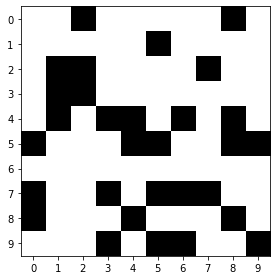

In [127]:
grid_array = grid.get_grid()
grid.draw_grid()

In [128]:
random_pairs = []
for _ in range(5):
  start = end = False
  while not (start and end):
    if not start:
      start_node = np.random.randint(0, grid.n**2)
    if start_node not in grid.blocked_sells and not start:
      start = True

    if not end:
      end_node = np.random.randint(0, grid.n**2)
    if end_node not in grid.blocked_sells and not end:
      end = True

  random_pairs.append((start_node, end_node))

Searching for a path between (5, 2) and (1, 9)


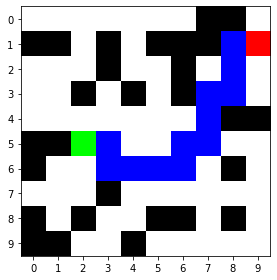

Searching for a path between (3, 3) and (1, 7)


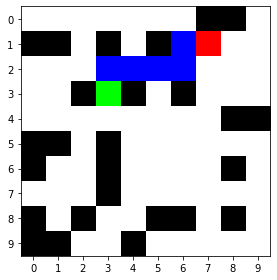

Searching for a path between (5, 2) and (8, 2)


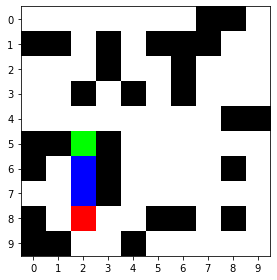

Searching for a path between (9, 4) and (3, 0)
No path found between two nodes
No path found!
Searching for a path between (1, 9) and (8, 1)


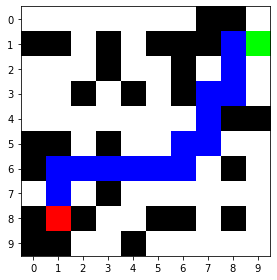

In [129]:
for pair in random_pairs:
  start_node, end_node = pair
  path = grid.astar(start_node, end_node)
  if len(path) != 0:
    grid.draw_path(path, save=False)
  else:
    print("No path found!")

Searching for a path between (4, 7) and (9, 0)
0.5800000000000001
0.6
0.62
0.64
0.66
0.68
0.7
0.72
0.74
0.76
0.5
0.52
0.54
0.56
0.5800000000000001
0.6000000000000001
0.6200000000000001
0.6400000000000001
0.66
0.68
0.48000000000000004
0.5
0.52
0.54
0.56
0.5800000000000001
0.6000000000000001
0.6200000000000001
0.64
0.66
0.46
0.48
0.5
0.52
0.54
0.56
0.5800000000000001
0.6000000000000001
0.62
0.64
0.44000000000000006
0.46
0.48000000000000004
0.5
0.52
0.54
0.56
0.5800000000000001
0.6
0.62
0.42000000000000004
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.4
0.42000000000000004
0.44000000000000006
0.46
0.48000000000000004
0.5
0.52
0.54
0.56
0.5800000000000001


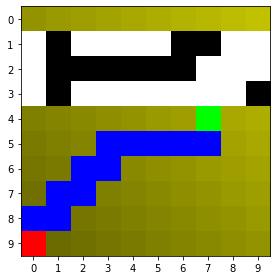

Searching for a path between (8, 9) and (0, 0)
No path found between two nodes
No path found!
Searching for a path between (3, 5) and (6, 1)
0.54
0.52
0.54
0.56
0.5800000000000001
0.6000000000000001
0.6200000000000001
0.64
0.66
0.6799999999999999
0.46
0.44000000000000006
0.46
0.48000000000000004
0.5
0.52
0.54
0.56
0.5800000000000001
0.6
0.44
0.42000000000000004
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.42000000000000004
0.4
0.42000000000000004
0.44000000000000006
0.46
0.48000000000000004
0.5
0.52
0.54
0.56
0.44
0.42000000000000004
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.46
0.44000000000000006
0.46
0.48000000000000004
0.5
0.52
0.54
0.56
0.5800000000000001
0.6
0.48
0.46
0.48
0.5
0.52
0.54
0.56
0.5800000000000001
0.6000000000000001
0.62


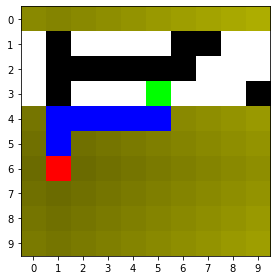

Searching for a path between (5, 1) and (8, 0)
0.56
0.58
0.6
0.62
0.64
0.66
0.6799999999999999
0.7
0.72
0.74
0.48000000000000004
0.5
0.52
0.54
0.56
0.5800000000000001
0.6000000000000001
0.6200000000000001
0.64
0.66
0.46
0.48
0.5
0.52
0.54
0.56
0.5800000000000001
0.6000000000000001
0.62
0.64
0.44000000000000006
0.46
0.48000000000000004
0.5
0.52
0.54
0.56
0.5800000000000001
0.6
0.62
0.42000000000000004
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.4
0.42000000000000004
0.44000000000000006
0.46
0.48000000000000004
0.5
0.52
0.54
0.56
0.5800000000000001
0.42000000000000004
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6


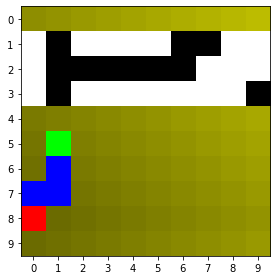

Searching for a path between (0, 4) and (4, 0)
No path found between two nodes
No path found!


In [78]:
for pair in random_pairs:
  start_node, end_node = pair
  path = grid.astar(start_node, end_node, use_equclidian=True)
  if len(path) != 0:
    grid.draw_path(path, save=False)
  else:
    print("No path found!")